## Домашняя работа по эпидемиологическим моделям в графах (часть 1)

Срок выполнения: 1 неделя

Баллы за данную часть составляеют 40% от баллов за все домашнее задание. 

Цель данной части: познакомиться на практике с инструмен тами моделирования эпидемии на графах.

Предлагаемые инструменты: 
- NetworkX
- SEIRS+  https://github.com/ryansmcgee/seirsplus/wiki

In [3]:
!pip install networkx
!pip install seirsplus

     |████████████████████████████████| 71kB 7.1MB/s 
  Created wheel for seirsplus: filename=seirsplus-1.0.9-cp36-none-any.whl size=64634 sha256=b95a911a1ae154ad67bcc5e34d0b01b242ad4f9b54c16f05394b93883c4ad082
  Stored in directory: /root/.cache/pip/wheels/f0/83/18/7b9b20364e2740f54c21cf5b3ebfde5a8a93071e098782c705
Successfully built seirsplus


In [2]:
from seirsplus.models import *
from seirsplus.networks import *
import networkx as nx
import numpy as np
from networkx.generators.random_graphs import barabasi_albert_graph 
import matplotlib.pyplot as plt 
import time
from tqdm.notebook import tqdm


### Задание 

**1) Генерация графа и запуск модели SEIR (10%)**
- Сгенерировать граф на 10 000 вершин типа barabasi_albert_graph
- Запустить на данном графе SEIR с параметрами:
    - SIGMA  = 1/5.2 
    - GAMMA  = 1/10 
    - MU_I   = 0.002
    - R0     = 2.5
    - BETA   = 1/(1/GAMMA) * R0
    - initI   = numNodes/100
- Сравнить течение смоделированного процесса с течением процесса в неграфовой модели с аналогичными параметрами.

In [154]:
numNodes=10000
m = 10
SIGMA = 1/5.2
GAMMA = 1/10
MU_I = 0.002
R0 = 2.5
BETA = 1/(1/GAMMA) * R0
BETA_Q = 0.5*BETA

initI = numNodes/100

In [155]:
G_base=barabasi_albert_graph(numNodes, m, seed=None)
model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I=MU_I)
model.run(T=300, print_interval=100)

t = 0.03
t = 100.01
t = 200.52


True

In [156]:
model_not_graph = SEIRSModel(initN=10000, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I=MU_I)
model_not_graph.run(T=300)

t = 299.90


True

Сравнение течения смоделированного процесса в графовой и неграфовой модели.
Графовая модель более точна.

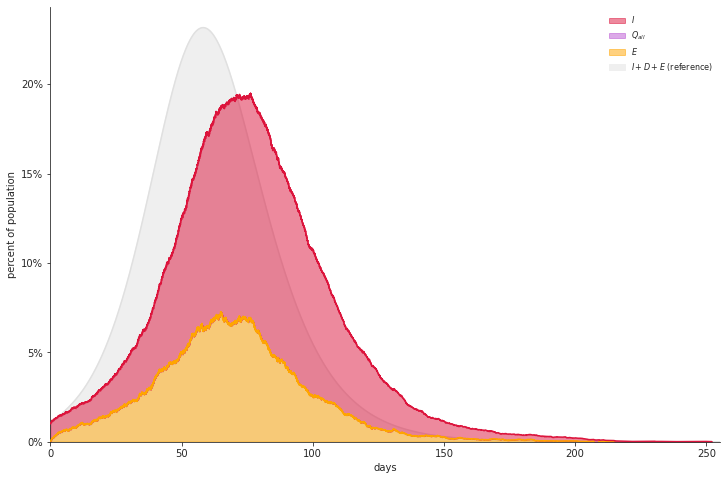

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9b19826a0>)

In [157]:
model.figure_infections(shaded_reference_results=model_not_graph)

**2) Моделирование карантинных мер (10%)**
- Смоделируйте карантинные меры при помощи custom_exponential_graph
- Сравните течение процесса с карантинными мерами и без

In [158]:
P  = 0.2 #Добавлю вероятность глобальных взаимодействий

G_quarantine = custom_exponential_graph(G_base, scale=5)
checkpoints = {'t':       [30, 120], 
               'G':       [G_quarantine, G_base],
               'p':       [0.5*P, P],
               'theta_E': [0.02, 0.02], #Тестирование контактных
               'theta_I': [0.02, 0.02]} #Тестирование инфицированных

fin_model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=initI,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I)
fin_model.run(T=300, checkpoints=checkpoints, print_interval=100)

t = 0.09
[Checkpoint: Updating parameters]
t = 100.00
[Checkpoint: Updating parameters]
t = 200.02
t = 300.02


True

Очевидно, что при наступлении карантина, резко снижается процент зараженных людей. При некоторых параметрах после окончания карантина возникает небольшая вспышка заболевания. Но все равно ситуация лучше, чем без карантина.

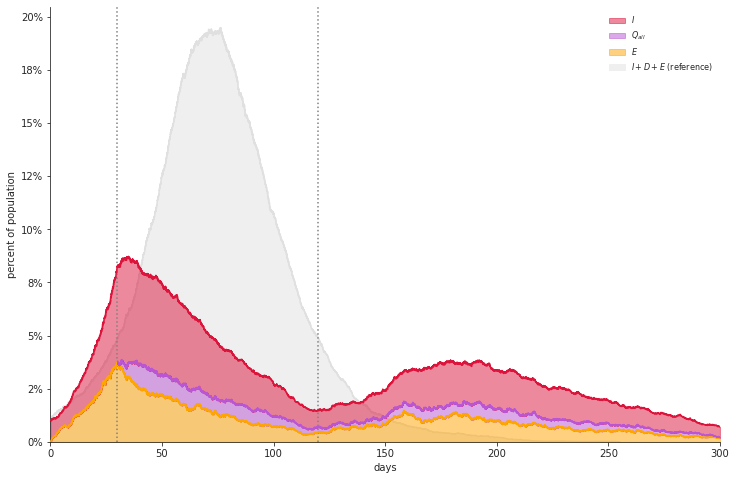

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9b197e780>)

In [159]:
fin_model.figure_infections(shaded_reference_results=model, vlines=checkpoints['t'])

**3) Индивидуальные карантинные меры и центральность (20%)**
- Рассмотрим следующие меры по предотвращению эпидемии: раз в заданное количество итераций мы проверяем состояние 0,5% самых значимых вершин. Если оказывается, что они больны, изолируем их. В качестве меры "значимости" используйте следующие центральности: degree_centrality, betweenness_centrality и 2 другие из реализованных в NetworkX на Ваш выбор.
- Сравнить течение процессов при использовании различных центральностей. Какая оказалась наиболее удачной для оценки рисков?

t = 0.00
t = 100.59
t = 0.02
[Checkpoint: Updating parameters]
[Checkpoint: Updating parameters]
t = 100.06


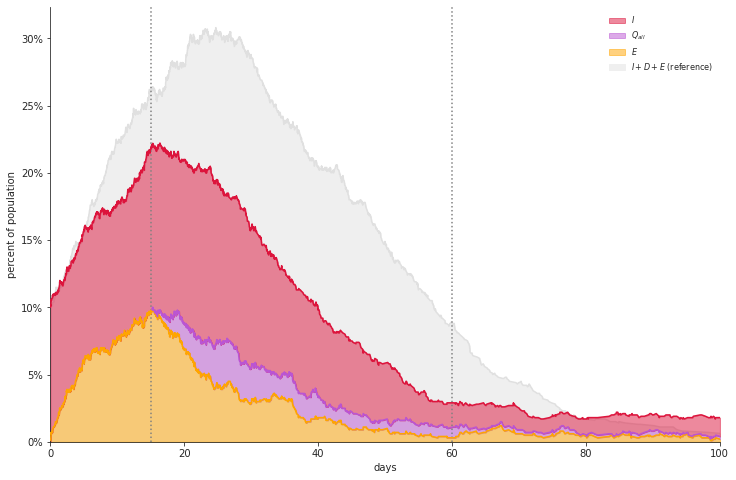

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9b20057b8>)

In [146]:
#Повторение 1 и 2 пункта с numNodes=1000  
#Уменьшим время карантина с 15 дня до 60. Пришлось из-за уменьшения числа узлов.


numNodes=1000
G_base=barabasi_albert_graph(numNodes, m, seed=None)
model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, initI=initI, mu_I=MU_I)
model.run(T=100, print_interval=100)
G_quarantine = custom_exponential_graph(G_base, scale=5)
checkpoints = {'t':       [15, 60], 
               'G':       [G_quarantine, G_base],
               'p':       [0.5*P, P],
               'theta_E': [0.02, 0.02], #Тестирование контактных
               'theta_I': [0.02, 0.02]} #Тестирование инфицированных

fin_model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=initI,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I)
fin_model.run(T=100, checkpoints=checkpoints, print_interval=100)

fin_model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=model) #Сравнение течения процесса с карантинными мерами и без

In [147]:
#Проверка не 0.5%, а 5% популяции. Иначе вообще нет разницы
#Изолируем и больных и контактных
#Проверяем людей каждые 3 дня 

betweenness_model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=initI,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I)

degree_model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=initI,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I)

closeness_model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=initI,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I)

eigenvector_model = SEIRSNetworkModel(G=G_base, beta=BETA, sigma=SIGMA, gamma=GAMMA, mu_I=MU_I, initI=initI,
                              G_Q=G_quarantine, beta_Q=BETA_Q, sigma_Q=SIGMA, gamma_Q=GAMMA, mu_Q=MU_I)

In [148]:
checkpoints_d15 = {'G':   G_quarantine,
               'p':       0.5*P,
               'theta_E': 0.02, #Тестирование контактных
               'theta_I': 0.02} #Тестирование инфицированных

checkpoints_d60 = {'G':  G_base,
               'p':       P,
               'theta_E': 0.02, #Тестирование контактных
               'theta_I': 0.02} #Тестирование инфицированных

In [149]:
def calc_centr(model, centr_function):

    centr = centr_function(model.G)
    list_centr = list(centr.items())
    list_centr.sort(key=lambda i: i[1], reverse=True)
    n_item = int(0.05*numNodes)

    for i in list_centr[:n_item]:
        if model.X[i[0]] == model.I or model.X[i[0]] == model.E:
            model.set_isolation(i[0], isolate=True)
            #print("На изоляции ", i[0])
    return model


In [150]:
def do_model(model, centr_function, T=100):
  check_15 = True
  check_60 = True
  flag_prev = 0
  while(model.t < T):
      model.run_iteration()
      n = int(model.t)
      if n%3 == 0 and n != flag_prev: #Проверяем людей каждые 3 дня
          model = calc_centr(model, centr_function)
          flag_prev = n

      if model.t >= 15 and check_15:
          for param in list(model.parameters.keys()):
              if(param in list(checkpoints_d15.keys())):
                  model.parameters.update({param: checkpoints_d15[param]})
                  model.update_parameters()
          check_15 = False

      if model.t >= 60 and check_60:
          for param in list(model.parameters.keys()):
              if(param in list(checkpoints_d60.keys())):
                  model.parameters.update({param: checkpoints_d60[param]})
                  model.update_parameters()
          check_60 = False
  return model

In [ ]:
betweenness_model = do_model(betweenness_model, nx.betweenness_centrality)
degree_model = do_model(degree_model, nx.degree_centrality)
closeness_model = do_model(closeness_model, nx.closeness_centrality)
eigenvector_model = do_model(eigenvector_model, nx.eigenvector_centrality)

Наиболее удачная центральность - eigenvector_centrality. На фоне - график модели с применением только карантинных мер (fin_model).


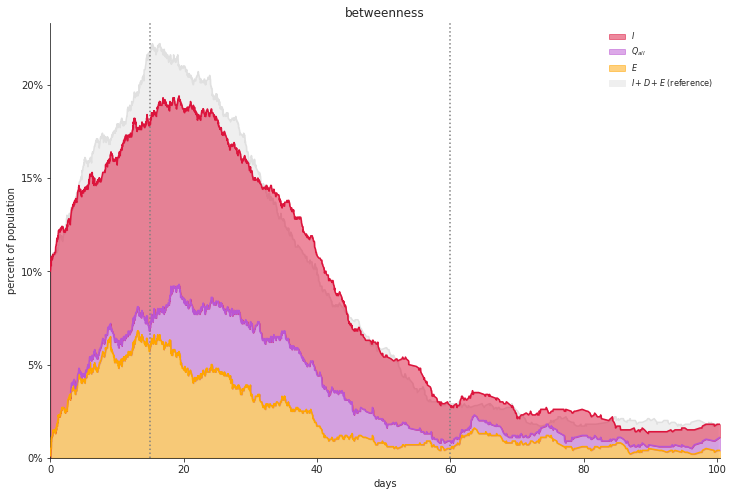

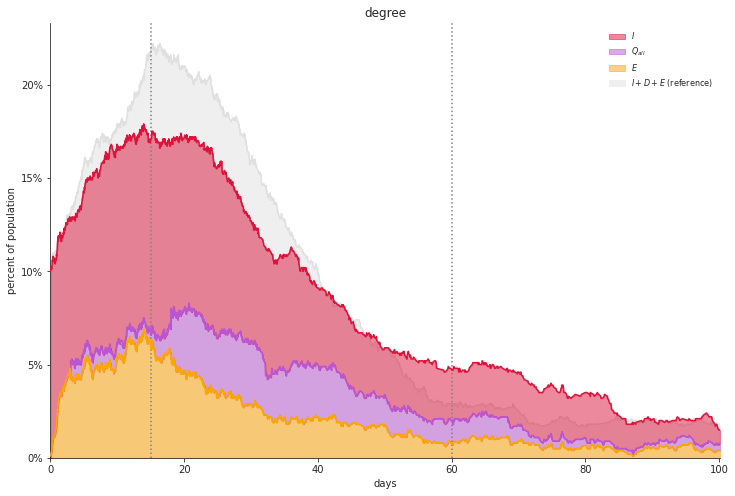

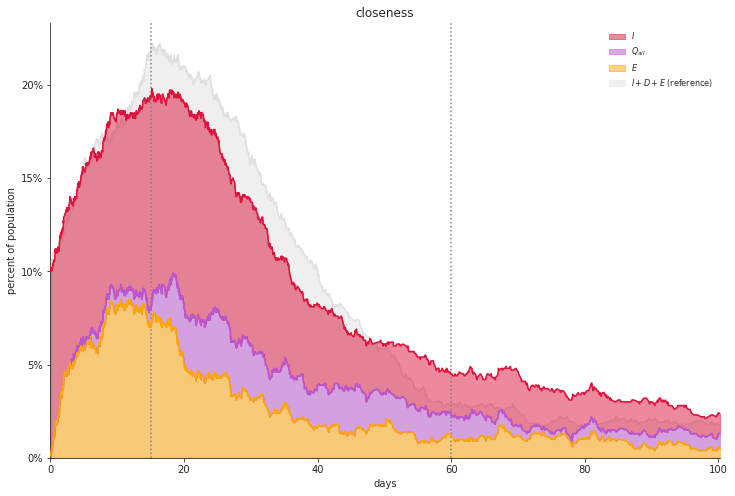

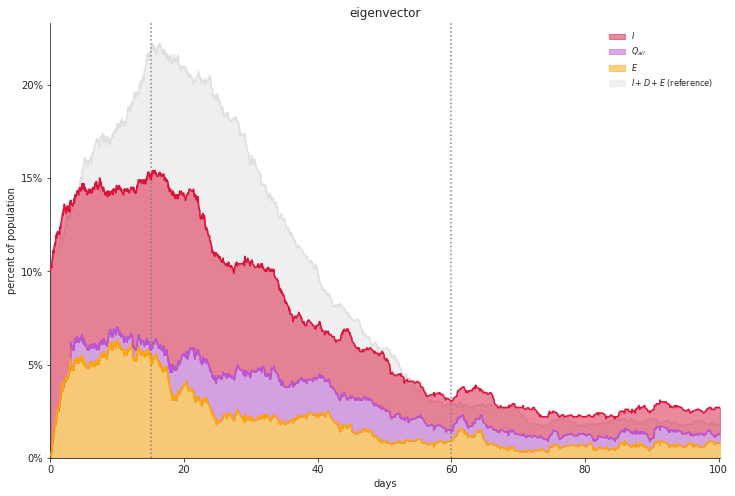

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb9b253e208>)

In [152]:
betweenness_model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=fin_model, title='betweenness')
degree_model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=fin_model, title="degree")
closeness_model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=fin_model, title="closeness")
eigenvector_model.figure_infections(vlines=checkpoints['t'], shaded_reference_results=fin_model, title="eigenvector") 

**4)(Бонус) Записать систему уравнений для модели SEIRS на графе в поточеченом приближении среднего поля. (5%)**